<a href="https://colab.research.google.com/github/Destructor169/ES670MM/blob/main/labs/ES670MM_Assignment1_The_Signal_Recovery_Initiative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project AETHER: The Signal Recovery Initiative

**Role:** Data Forensics Officer
**Mission Status:** CRITICAL \
**Location:** Lunar Forward Base, Mission Control
**Date:** January 29, 2140

---

### Mission Briefing

**Welcome, Officer.**

The autonomous research station **AETHER**, located in the frozen dark of the Kuiper Belt, has gone silent. Yesterday, a burst of raw, corrupted telemetry data finally pierced the static. The transmission is fragmented:
1.  **Text Logs:** Riddled with signal dropouts (missing words).
2.  **Visual Feeds:** Too bandwidth-heavy to decrypt in real-time.

### The Commander's Directive
> *"You are the last line of defense between knowledge and oblivion. Your orders are to use **Matrix Methods** to clean, decode, and compress the signal. We need to read the logs and see the images before the transmission fades forever."*

### Protocol Warning
> *"Be warned: The system validates every line of code. Officers found using 'Ghost Scripts'—unauthorized or plagiarized algorithms—will have their clearance revoked immediately. In Data Forensics, there is no room for borrowed answers. Only your own logic can decrypt the truth."*

**The signal is waiting...**
**Initialize Task 1.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Task 1: The Corrupted Logbook (Contextual Word Recovery) - 4 marks

##  Objective
Restore missing words (`**`) in corrupted sentences using **contextual vector similarity** and **linear algebra**, without using any pretrained language models.

---

##  The Intelligence Report
A long-running text generation system aboard a research station suffered memory corruption after a cosmic radiation event. As a result, individual words in log entries were replaced with the symbol `**`.

You are provided with a **large archive of clean historical sentences **.  
Your mission is to **mathematically infer** the missing word using only this archive.

---


##  The Strategy
To recover a missing word, your system must:

1. **Build a Bag-of-Words matrix**
   - Rows represent  documents
   - Columns represent vocabulary terms

2. **Construct a query vector**
   - Ignore the missing word (`**`)
   - Count all remaining words in the corrupted sentence

3. **Retrieve relevant documents**
   - Use cosine similarity to find the most similar historical documents
   - Restrict inference to only these documents

4. **Extract local context**
   - Identify words surrounding the missing position
   - Ignore stopwords and the masked token

5. **Score candidate words**
   - For each vocabulary word:
     - Extract its frequency vector across retrieved documents
     - Compare it with the context signal using cosine similarity

6. **Predict the missing word**
   - Rank candidates by similarity score
   - Return the top-K most likely words

All code must be written from scratch using only **NumPy** (no other libraries allowed).

---


In [ ]:
import numpy as np
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = text.strip()
    text = re.sub(r'\.\s*$', '', text)
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def load_documents(txt_path):
    with open(txt_path, "r", encoding="utf-8") as f:
        docs = [clean_text(line) for line in f if line.strip()]
    return docs


In [ ]:
def build_bow(documents):
    """
    Construct a Bag-of-Words (BoW) representation from a list of documents.

    Parameters
    ----------
    documents : list of str
        A list of preprocessed (cleaned) documents, where each document
        is a whitespace-separated string of tokens.

    Returns
    -------
    X : np.ndarray of shape (num_docs, vocab_size)
        Document-term matrix where X[i, j] denotes the frequency of the
        j-th vocabulary word in the i-th document.

    vocab : list of str
        Sorted list of all unique words appearing in the corpus.

    vocab_dict : dict
        Dictionary mapping each vocabulary word to its corresponding
        column index in the document-term matrix.
    """
    # TODO: implement from scratch
    pass


In [ ]:
def cosine_similarity(a, b):
    """
    Compute cosine similarity between two  vectors.
    """
    # TODO: implement from scratch
    pass


In [ ]:
def get_context(tokens, window=4):
    """
    Given tokenized sentence containing '**',
    return a set of surrounding context words.
    """
    # TODO: implement from scratch
    pass


In [ ]:
def retrieve_top_documents(X, q, k):
    """
    Input:
        X -> document-term matrix
        q -> query vector
        k -> number of top documents
    Output:
        indices of top-k documents
    """
    # TODO:
    # 1. compute cosine similarity between q and each row of X
    # 2. return indices of top-k documents
    pass

In [ ]:
## Do not make changes here
def score_candidates(
    X,
    vocab,
    vocab_dict,
    top_doc_ids,
    context,
    cosine_fn
):
    """
    Uses ONLY:
      - word vectors from top documents
      - context co-occurrence signal
      - cosine similarity implemented by students
    """

    context_vec = np.zeros(len(top_doc_ids))

    for i, d in enumerate(top_doc_ids):
        for w in context:
            if w in vocab_dict:
                context_vec[i] += X[d][vocab_dict[w]]

    scores = np.zeros(len(vocab))

    for v in range(len(vocab)):
        word_vec = X[top_doc_ids, v]

        scores[v] = cosine_fn(word_vec, context_vec)

    return scores


In [ ]:
def decode_missing_word(
    sentence,
    X,
    vocab,
    vocab_dict,
    top_docs=20,
    top_words=5,
    window=4
):
    tokens = sentence.split()

    # --- build query vector ---
    q = np.zeros(len(vocab))
    for w in tokens:
        if w != "**" and w in vocab_dict:
            q[vocab_dict[w]] += 1

    # --- retrieve top documents ---
    top_doc_ids = retrieve_top_documents(X, q, top_docs)

    # --- get context ---
    context = get_context(tokens, window)

    # --- scoring ---
    scores = score_candidates(
        X,
        vocab,
        vocab_dict,
        top_doc_ids,
        context,
        cosine_similarity
    )


    for w in tokens:
        if w in vocab_dict:
            scores[vocab_dict[w]] = 0

    for w, i in vocab_dict.items():
        if w in stop_words:
            scores[i] = 0

    top_idx = np.argsort(scores)[-top_words:][::-1]
    return [vocab[i] for i in top_idx]


In [ ]:
docs = load_documents("/content/drive/MyDrive/ES670MM/dataset/A/text/sentences.txt")

X, vocab, vocab_dict = build_bow(docs)

test_sentences = [
    "They decided to plant an ** of cotton candy.",
    "** make great weapons when water balloons aren’t available.",
    "The tumbleweed refused to tumble but was more than ** to prance.",
    "Nancy thought the best way to create a ** home was to line it with barbed wire.",
    "The underground ** was filled with chips and candy.",
    "The dead trees ** to be ignited by the smallest spark and seek their revenge.",
    "The overpass went under the ** and into a secret world.",
    "His get rich quick scheme was to grow a ** farm.",
    "Siri became ** when we reused to follow her directions.",
    "She found it strange that people use their cellphones to actually ** to one another.",
]

for i, sentence in enumerate(test_sentences, 1):
    predictions = decode_missing_word(
        sentence,
        X,
        vocab,
        vocab_dict
    )

    print(f"\nSentence {i}: {sentence}")
    print("Top 5 predictions:", predictions)

Documents loaded: 724

Sentence 1: They decided to plant an ** of cotton candy.
Top 5 predictions: ['orchard', 'candy', 'make', 'time', 'ass']

Sentence 2: ** make great weapons when water balloons aren’t available.
Top 5 predictions: ['tomatoes', 'available', 'trowel', 'candied', 'others']

Sentence 3: The tumbleweed refused to tumble but was more than ** to prance.
Top 5 predictions: ['go', 'willing', 'prance', 'old', 'enough']

Sentence 4: Nancy thought the best way to create a ** home was to line it with barbed wire.
Top 5 predictions: ['welcoming', 'nancy', 'wire', 'willing', 'depths']

Sentence 5: The underground ** was filled with chips and candy.
Top 5 predictions: ['candy', 'bunker', 'care', 'flooded', 'news']

Sentence 6: The dead trees ** to be ignited by the smallest spark and seek their revenge.
Top 5 predictions: ['waited', 'revenge', 'right', 'mean', 'give']

Sentence 7: The overpass went under the ** and into a secret world.
Top 5 predictions: ['highway', 'world', 'ende

### **Analysis Question**
**Why is cosine similarity preferred over Euclidean distance for this task? In what situation could Euclidean distance lead to misleading results?**

#  Task 2: Visual Bandwidth Optimization (Image Segmentation) - 6 marks

**Mission:** Compress the visual feed from the *Aether* station. \
**Objective:** Implement **Vectorized K-Means Clustering** from scratch to quantize image colors.

The *Aether* is trying to send high-resolution images of an "Anomaly," but our bandwidth is limited. We cannot stream millions of colors. We must **quantize** the image, reducing it to just $K$ distinct "channels" (colors) without losing structural info.


In [ ]:
# importing all necessary files

from google.colab import drive
import os
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Ensure this path matches exactly where you uploaded the 'dataset' folder
base_path = "/content/drive/MyDrive/ES670MM/dataset/A/images"

if os.path.exists(base_path):
    print(f"Secure connection established to: {base_path}")
    files = os.listdir(base_path)
    print(f"Found {len(files)} files in the directory.")
else:
    print(f"Error: Path not found. Please check your folder structure in Drive.")

## The Matrix Engine (Distance Calculation)

**The Challenge:** Calculating the distance between every pixel and every centroid using **Matrix Broadcasting**. Don't use unnecessary `for` loop because it's too slow for real-time processing.

**Mathematical Identity:**
To calculate the squared Euclidean distance $||X - C||^2$ efficiently, expand the term:
$$||X - C||^2 = ||X||^2 + ||C||^2 - 2(X \cdot C^T)$$

**Your Task:**
Fill in the `get_distances` function.
* **Input:** Matrix $X$ of pixels $(N, 3)$ and Matrix $C$ of centroids $(K, 3)$.
* **Output:** Matrix of distances $(N, K)$.

All code must be written from scratch using only NumPy (no other libraries allowed).

In [ ]:
def get_distances(X, centroids):
    """
    Computes Euclidean distance between every row in X and every row in centroids.
    """
    dot_product = None

    X_squared = None

    C_squared = None

    dists = None

    return dists

## The Clustering Loop (E-Step & M-Step)

**The Challenge:** Now that we can calculate distances efficiently, we need to iterate until the best colors are found.

**Your Task:**
Implement the main K-Means loop in `kmeans_algorithm`.
1.  **E-Step (Expectation):** Assign every pixel to the nearest centroid.
2.  **M-Step (Maximization):** Move the centroid to the average color of its assigned pixels.

In [ ]:
def kmeans_algorithm(X, k, max_iters=100):
    """
    K-Means implementation from scratch using numpy matrix operations.
    """
    n_samples, n_features = X.shape

    # Initialize Centroids: Randomly pick 'k' pixels from the image
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]

    labels = np.zeros(n_samples)

    print(f"Starting K-Means with K={k}...")

    for i in range(max_iters):

        # TODO: Implement the E-Step (Assignment)
        dists = get_distances(X, centroids)

        # Write your code here
        new_labels = None

        # Check for convergence
        if np.all(labels == new_labels):
            print(f"  -> Converged at iteration {i}")
            break
        labels = new_labels


        # TODO: Implement the M-Step (Update)
        # Calculate new centroids by taking the MEAN of all pixels in that cluster

        new_centroids = np.zeros((k, n_features))

        for cluster_idx in range(k):
            # WRITE YOUR CODE HERE
            pass

        centroids = new_centroids

    return centroids, labels

## Execution & Visualization

**The Challenge:** We need to test the compression algorithm on the corrupted feed. We will test different "bandwidths" (Values of K) to find the best trade-off between quality and size.

**Your Task:**
1.  Run the code below.
2.  It will loop through different values of K .
3.  **Observation:** Watch how the image quality changes.

Starting Batch Visualization for 8 images...
Testing Bandwidths: [2, 3, 4, 5, 6, 8, 10]

Processing Feed ID: 5...
  -> Converged at iteration 10
  -> Converged at iteration 19


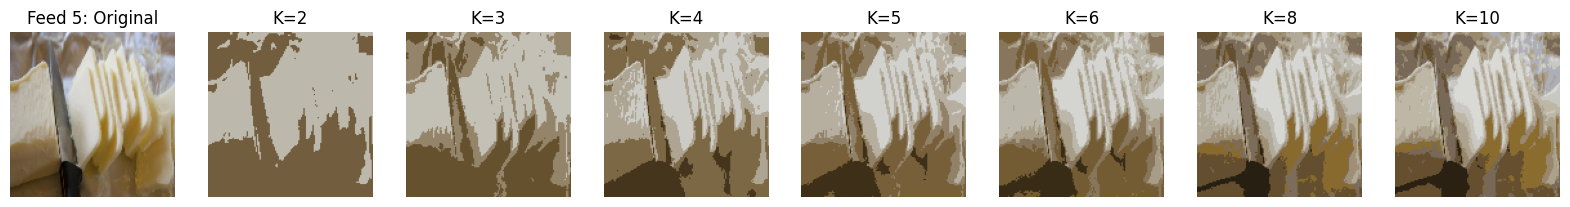


Processing Feed ID: 6...
  -> Converged at iteration 12
  -> Converged at iteration 9


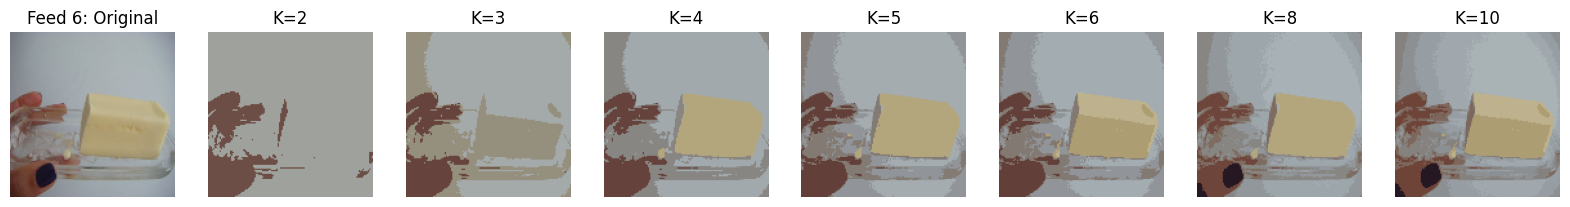


Processing Feed ID: 7...
  -> Converged at iteration 7
  -> Converged at iteration 10
  -> Converged at iteration 12
  -> Converged at iteration 18


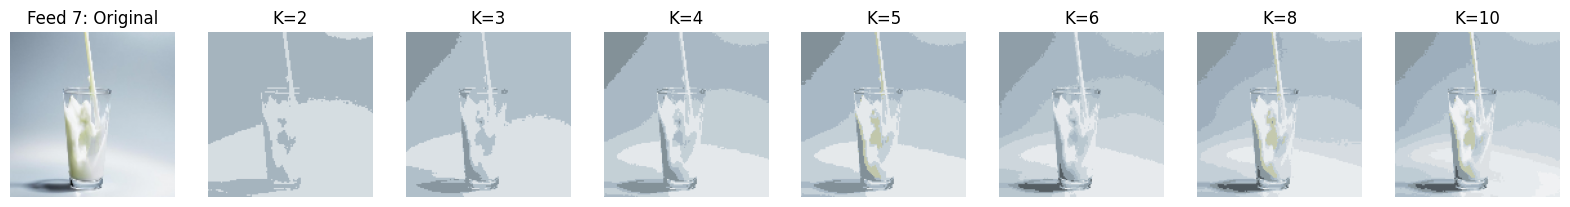


Processing Feed ID: 8...
  -> Converged at iteration 9
  -> Converged at iteration 19
  -> Converged at iteration 15


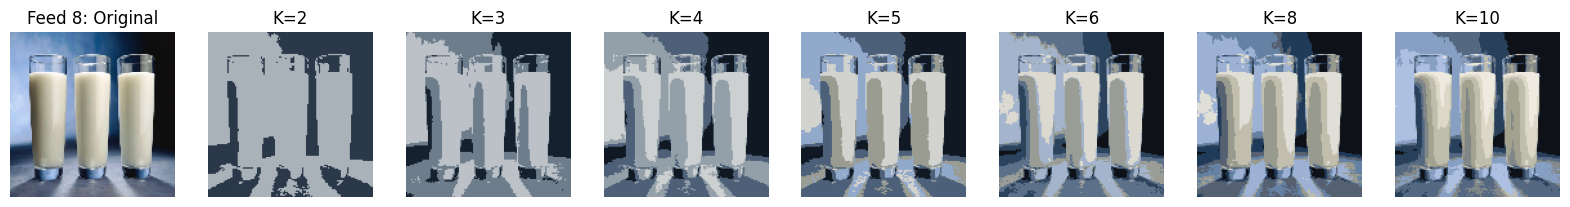


Processing Feed ID: 9...
  -> Converged at iteration 7
  -> Converged at iteration 17
  -> Converged at iteration 27


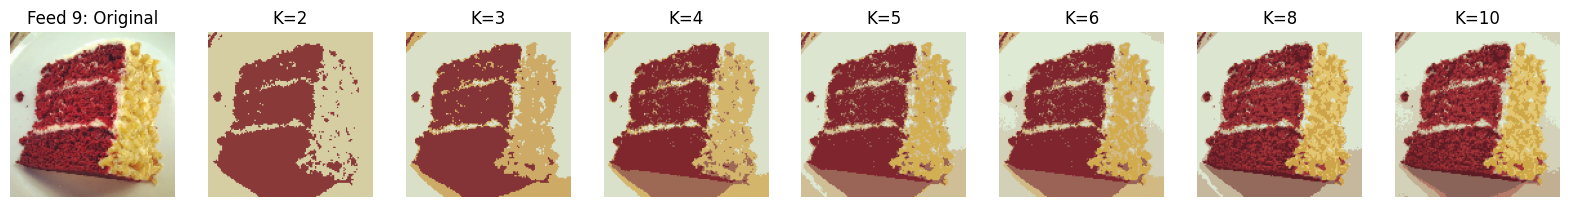


Processing Feed ID: 10...
  -> Converged at iteration 9
  -> Converged at iteration 11
  -> Converged at iteration 21


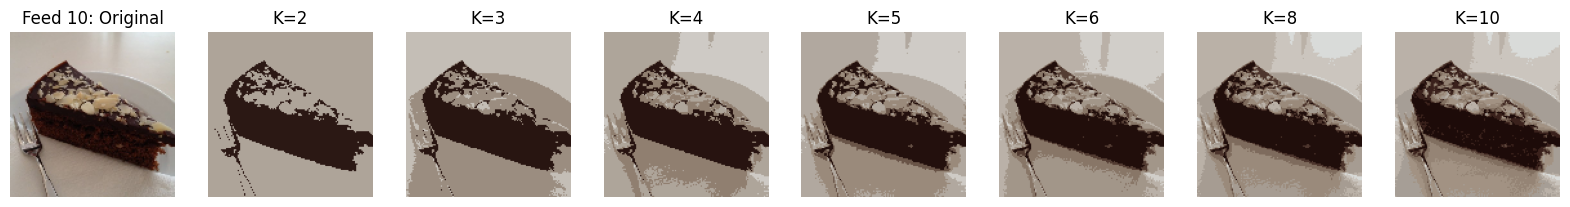


Processing Feed ID: 11...
  -> Converged at iteration 16
  -> Converged at iteration 19


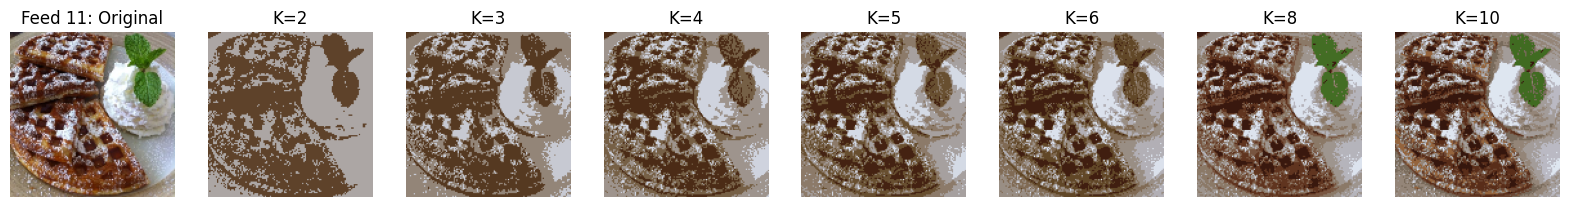


Processing Feed ID: 12...
  -> Converged at iteration 6
  -> Converged at iteration 15
  -> Converged at iteration 27
  -> Converged at iteration 20
  -> Converged at iteration 29


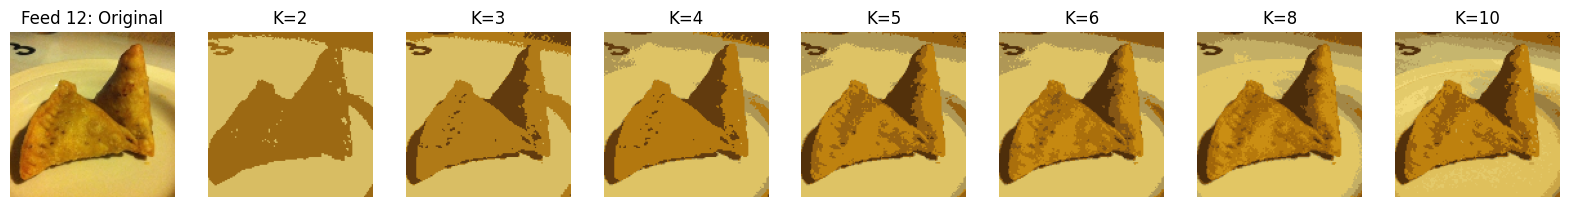


Batch Processing Complete.


In [ ]:
# You have 8 images to visualize
visual_ids = [5, 6, 7, 8, 9, 10, 11, 12]

# The specific bandwidths (K) you want to test per image
# You can play with different values of k
bandwidths = [2, 3, 4, 5, 6, 8, 10]

print(f"Starting Batch Visualization for {len(visual_ids)} images...")
print(f"Testing Bandwidths: {bandwidths}")

for img_id in visual_ids:
    try:
        # 1. Load Image
        path = f"{base_path}/image_{img_id}.png"
        if not os.path.exists(path):
            print(f"Warning: File not found: {path}")
            continue

        print(f"\nProcessing Feed ID: {img_id}...")
        image = io.imread(path)

        # Normalize
        image = np.array(image, dtype=np.float64) / 255.0
        if image.shape[2] == 4: image = image[:,:,:3] # Drop Alpha
        h, w, c = image.shape
        X = image.reshape(-1, 3)

        plt.figure(figsize=(20, 4))

        # Plot Original
        plt.subplot(1, len(bandwidths)+1, 1)
        plt.title(f"Feed {img_id}: Original")
        plt.imshow(image)
        plt.axis('off')

        # 3. Loop through Bandwidths
        for i, K in enumerate(bandwidths):
            final_colors, pixel_labels = kmeans_algorithm(X, K, max_iters=30)

            # Reconstruct
            reconstructed_flat = final_colors[pixel_labels.astype(int)]
            reconstructed_image = reconstructed_flat.reshape(h, w, c)

            # Plot Compressed (Subsequent Columns)
            plt.subplot(1, len(bandwidths)+1, i+2)
            plt.title(f"K={K}")
            plt.imshow(reconstructed_image)
            plt.axis('off')

        plt.show()

    except Exception as e:
        print(f"Error processing image {img_id}: {e}")

print("\nBatch Processing Complete.")

## The Optimization (Finding the "Elbow")

**The Challenge:** Visual inspection is subjective. How do we mathematically define the "optimal" number of colors?

We use the **Elbow Method**. We plot the **Inertia** (Total Squared Error) vs. $K$.
* **Inertia Formula:** The sum of squared distances between every pixel and its assigned centroid.
    $$J = \sum_{i=1}^{N} ||x_i - \mu_{z_i}||^2$$
* **Goal:** Find the $K$ where the decrease in error starts to flatten out (diminishing returns).

**Your Task:**
1.  Implement `calculate_inertia` using matrix operations.
2.  Run the loop for $K = 1$ to $12$.
3.  Plot the graph.



In [ ]:
def calculate_inertia(X, centroids, labels):
    """
    Calculates the total squared error (Inertia) efficiently.
    """
    # Write the code here
    assigned_centroids = None


    squared_diffs = None


    inertia = None

    return inertia

In [ ]:
analysis_ids = [1, 2, 3, 4]
max_k = 12

plt.figure(figsize=(12, 8))
plt.title("Comparative Elbow Analysis: All Signals", fontsize=16)
plt.xlabel("Bandwidth (K)", fontsize=12)
plt.ylabel("Inertia (Total Reconstruction Error)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

colors = ['red', 'blue', 'green', 'purple']

print("Starting Calibration Sequence...")

for idx, img_id in enumerate(analysis_ids):
    try:
        # Load Image
        path = f"{base_path}/image_{img_id}.png"
        image = io.imread(path)
        image = np.array(image, dtype=np.float64) / 255.0
        if image.shape[2] == 4: image = image[:,:,:3]
        X = image.reshape(-1, 3)

    except Exception as e:
        print(f"Skipping Image {img_id}: {e}")
        continue

    # Calculate Elbow Curve
    inertias = []
    k_range = range(1, max_k + 1)

    print(f"  > Analyzing Signal {img_id}...")

    for k in k_range:
        # Run Engine
        centroids, labels = kmeans_algorithm(X, k, max_iters=100)

        # Calculate Inertia
        cost = calculate_inertia(X, centroids, labels)

        inertias.append(cost)

    # Plot on the SAME graph
    plt.plot(k_range, inertias, marker='o', linewidth=2,
             color=colors[idx % len(colors)],
             label=f"Image {img_id}")

plt.legend(fontsize=12)
plt.show()

## Critical Analysis

> **Question:**
> From the above generated graph, figure out the optimal value of k for each image? Write your observation on the performance of clustering when K increases from 1 to 15 ?

> Feel free to explore image segmentation for higher values of k and note the observation.s